In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as mp
import matplotlib.ticker as ticker


df = pd.read_csv('erie_total.csv')

df

,Name,Population,Sq Mi,Zip Code,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,...,7/17/2020,7/18/2020,7/19/2020,7/20/2020,7/23/2020,7/25/2020,7/26/2020,7/27/2020,7/28/2020,7/29/2020
0,Akron,9549,59.61,14001,34,35,36,37,37,38,...,39,39,39,39,39,39,39,39,39,39
1,Alden,12851,46.68,14004,61,61,61,61,61,61,...,69,69,69,70,70,71,71,72,72,72
2,Angola,10113,28.86,14006,17,17,17,17,17,17,...,29,29,29,30,30,30,30,30,30,30
3,Basom,1923,41.17,14013,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boston,3060,23.54,14025,9,9,9,9,9,9,...,11,11,11,11,11,11,11,12,12,12
5,Bowmansville,910,0.79,14026,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
6,Chaffee,1867,20.90,14030,1,1,1,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7,Clarence,10145,20.83,14031,76,76,76,78,78,78,...,84,84,84,84,84,84,84,84,84,84
8,Clarence Center,8964,25.14,14032,35,35,35,35,35,35,...,45,47,47,47,48,50,50,50,50,50
9,Colden,2396,19.96,14033,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3


In [2]:
date= '7/29/2020'

In [3]:
df_top = df.sort_values(df.columns[-1], ascending = False)
df_top = df_top.iloc[0:10,:]

#Per Pop
#seperate
df_sep = df.drop(df.iloc[:, 0:4], axis=1)

#Divide
df_short = 1000*df_sep.div(df.iloc[:,1],axis=0)

#put back names
df_short.insert(0, column='Name', value=df['Name'])

#sort
df_sort = df_short.sort_values(df_short.columns[-1], ascending = False)

df_sort1 = df_sort.iloc[0:10,:]

# Top by Population

[]

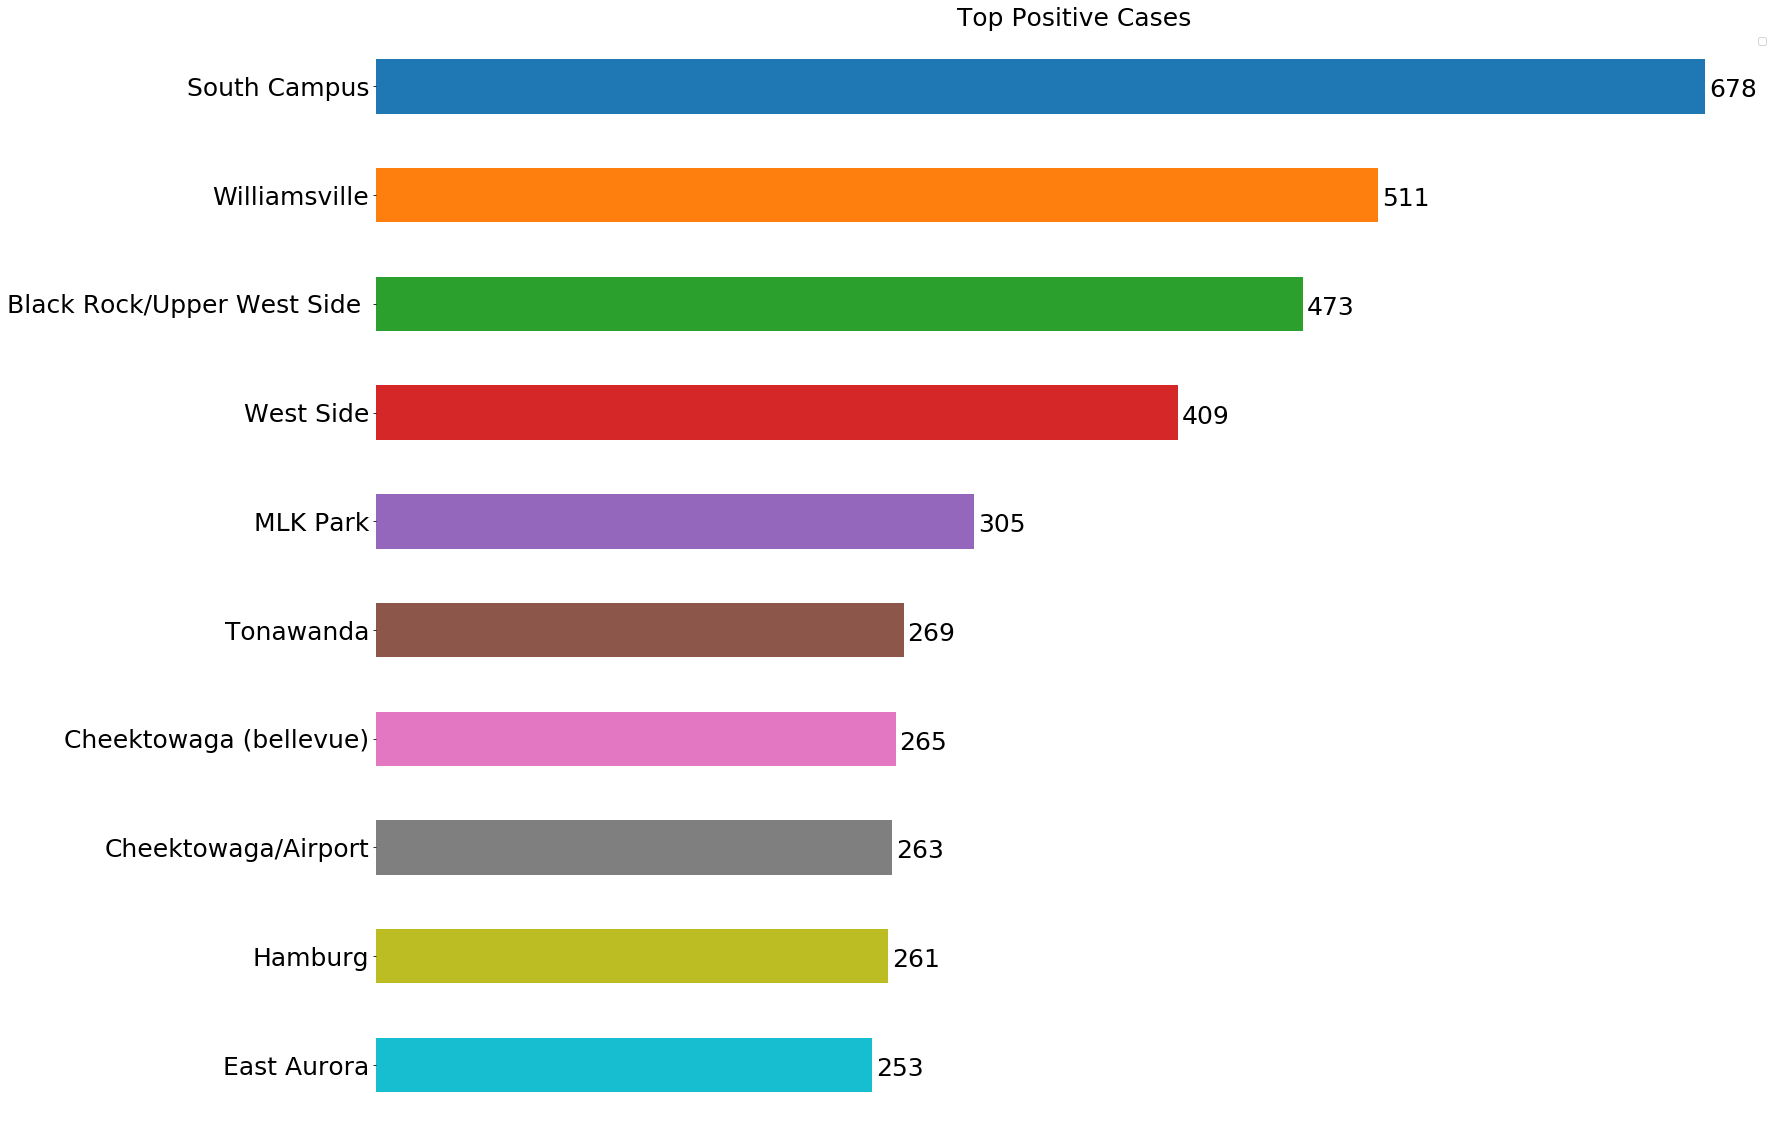

In [65]:
#Date
df_top.plot.barh(y=date,x='Name',figsize=(25,20))
plt.title('Top Positive Cases',size=25)
ax = plt.gca()
ax.invert_yaxis()

for i, v in enumerate(df_top[date]):
    ax.text(v + 2, i + 0.1, str(v), color='black',size=25)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(fontsize=25)

plt.ylabel('')
plt.legend('')
ax.get_xaxis().set_ticks([])

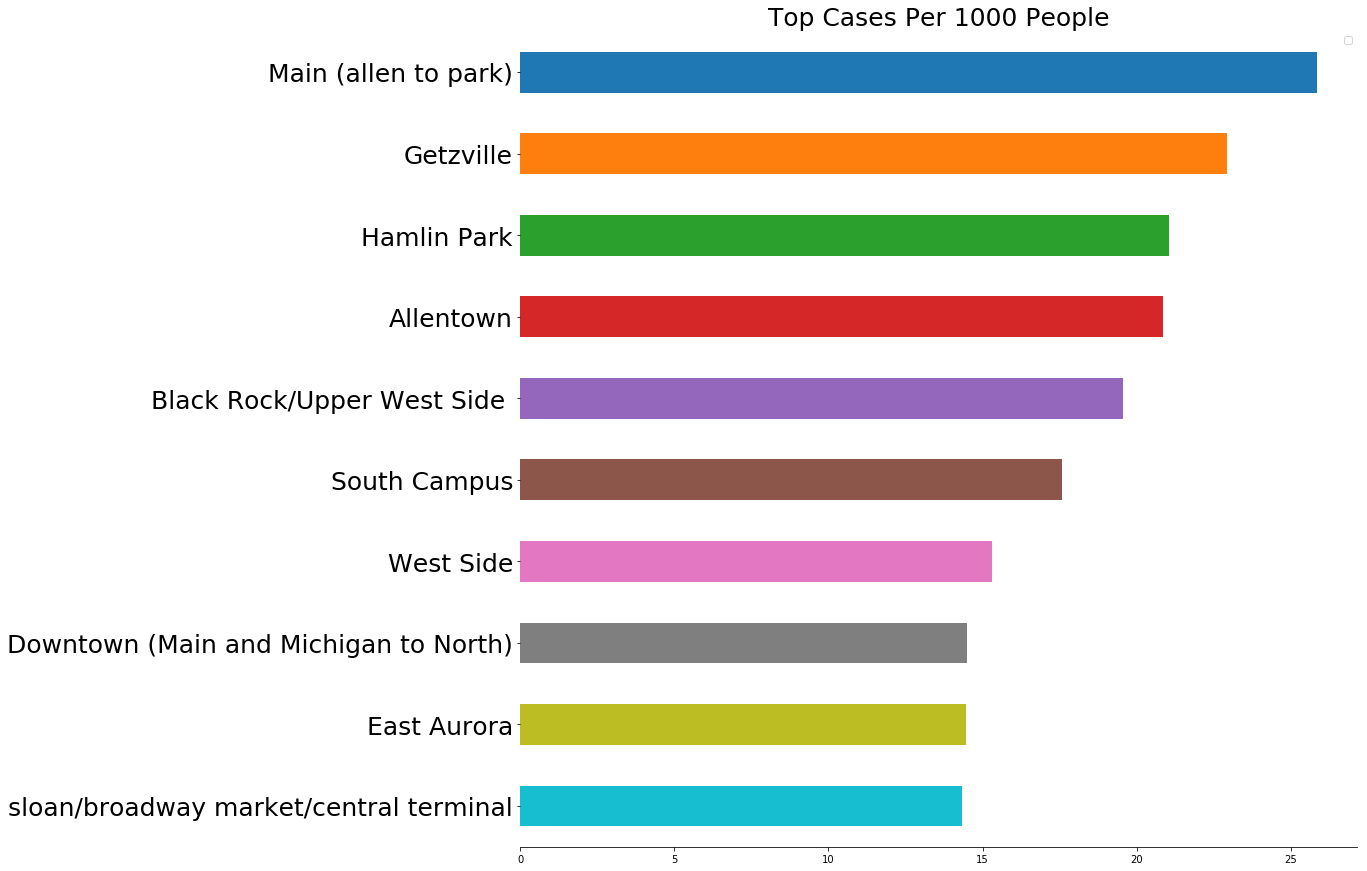

In [58]:
#date
df_sort1.plot.barh(y=date,x='Name',figsize=(15,15))
plt.title('Top Cases Per 1000 People',size=25)

ax = plt.gca()
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(fontsize=25)

plt.ylabel('')
plt.legend('')
#ax.get_xaxis().set_ticks([])

# Daily Cases

In [6]:
diff = df_sep.diff(axis = 1) 
diff.insert(0, column='Name', value=df['Name'])
diff.fillna(0,inplace=True)

#not smooth data
diff_sort = diff.sort_values(diff.columns[-1], ascending = False)

diff_sort

diff10 = diff_sort.iloc[0:10,:]
#------
diff1 = diff.T
new_header = diff1.iloc[0] #grab the first row for the header
diff1 = diff1[1:] #take the data less the header row
diff1.columns = new_header

window = 10

rol = diff1.rolling(window).sum()/window

rolt = rol.T

rol_srt = rolt.sort_values(rolt.columns[-1], ascending = False)
rol10 = rol_srt.iloc[0:10,:]

In [7]:
diff_sort

,Name,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,...,7/17/2020,7/18/2020,7/19/2020,7/20/2020,7/23/2020,7/25/2020,7/26/2020,7/27/2020,7/28/2020,7/29/2020
42,West Seneca,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,6.0,0.0,1.0,4.0,2.0,0.0,2.0,0.0,7.0
57,Williamsville,0.0,3.0,1.0,7.0,2.0,0.0,5.0,0.0,0.0,...,0.0,4.0,0.0,4.0,6.0,3.0,0.0,4.0,0.0,6.0
43,Black Rock/Upper West Side,0.0,10.0,2.0,14.0,16.0,0.0,2.0,0.0,0.0,...,0.0,4.0,0.0,8.0,5.0,4.0,0.0,7.0,0.0,5.0
56,south park (mercy hospital of buffalo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,4.0
50,South Main St/FLR House,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,4.0
62,Amherst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,2.0,2.0,3.0,0.0,2.0,0.0,3.0
22,Grand Island,0.0,2.0,0.0,3.0,2.0,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,2.0,1.0,4.0,0.0,2.0,0.0,3.0
63,Cheektowaga (bellevue),0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,3.0,0.0,0.0,0.0,2.0
51,South Campus,0.0,11.0,6.0,7.0,6.0,0.0,7.0,0.0,0.0,...,0.0,12.0,0.0,7.0,8.0,7.0,0.0,7.0,0.0,2.0
55,Blasdell (wegmans),0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0


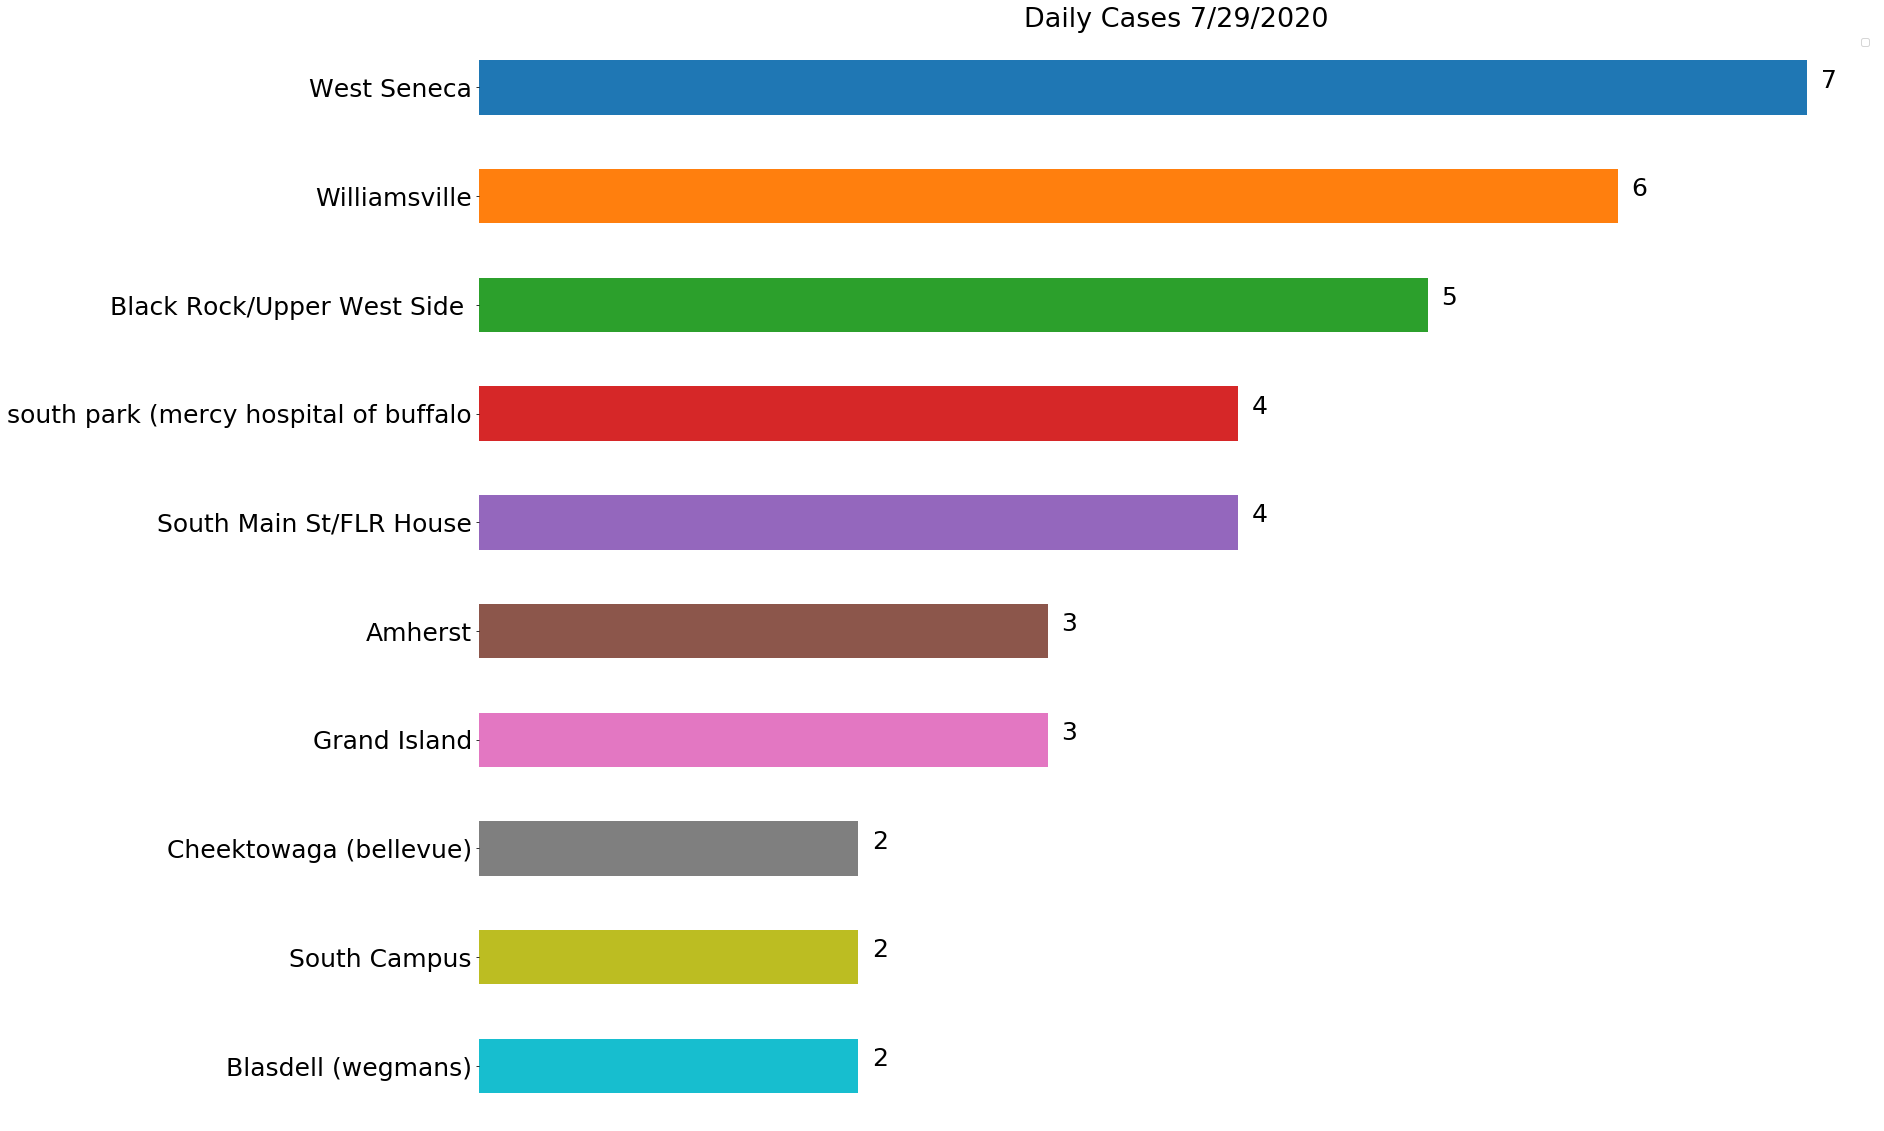

In [66]:
#Not always cases measured each day
#Date
diff10.plot.barh(y=date,x='Name',figsize=(25,20))
plt.title('Daily Cases '+str(date),size=27)

ax = plt.gca()
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(fontsize=25)

plt.ylabel('')
plt.legend('')
ax.get_xaxis().set_ticks([])

for i, v in enumerate(diff10[date]):
    ax.text(v + 0.07, i + 0, str(str(v)[:-2]), color='black',size=25)

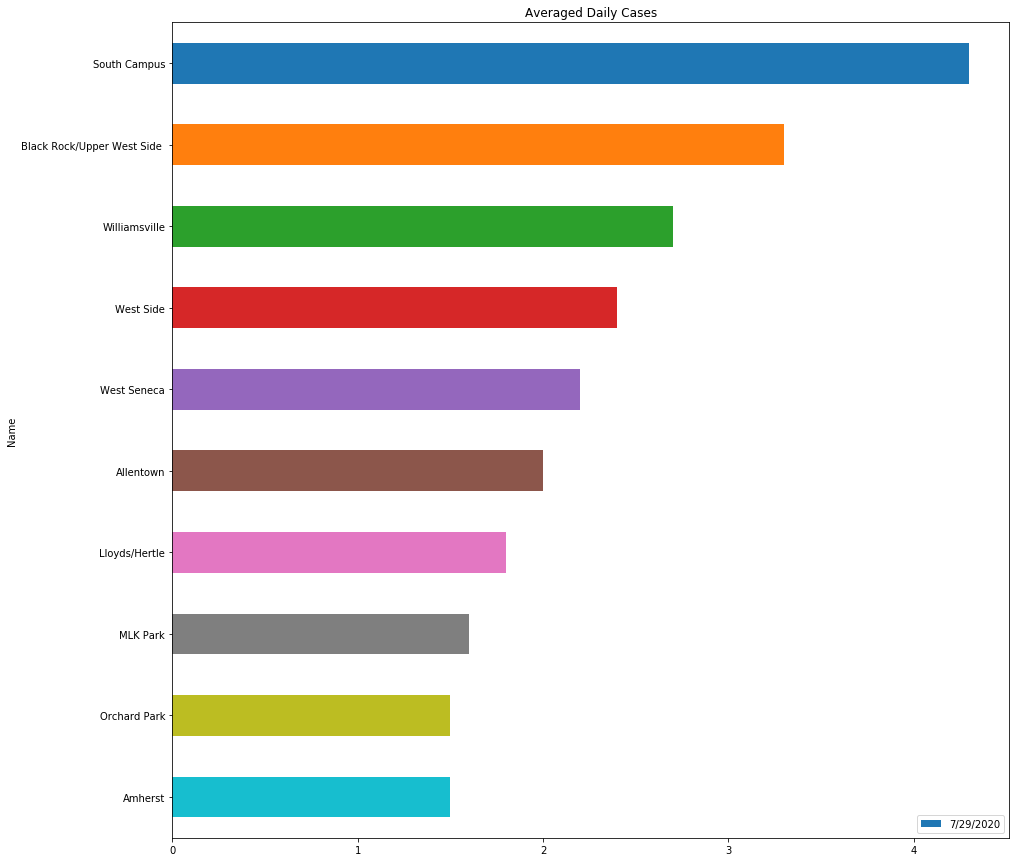

In [9]:
rol10.plot.barh(y=date,figsize=(15,15))
plt.title('Averaged Daily Cases')
ax = plt.gca()
ax.invert_yaxis()


In [10]:
rol10

,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,...,7/17/2020,7/18/2020,7/19/2020,7/20/2020,7/23/2020,7/25/2020,7/26/2020,7/27/2020,7/28/2020,7/29/2020
Name,,,,,,,,,,,,,,,,,,,,,
South Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7,...,6.1,6.5,5.6,6.3,7.1,6.3,5.8,5.8,5.1,4.3
Black Rock/Upper West Side,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.1,...,3.5,3.6,3.3,4.1,4.6,4.4,3.6,3.8,3.2,3.3
Williamsville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8,...,3.1,2.8,2.5,2.9,3.5,2.6,2.5,2.5,2.3,2.7
West Side,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4,...,3.7,3.8,3.7,4.8,4.8,4.2,3.7,3.6,3.1,2.4
West Seneca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,...,1.7,2.1,2.0,2.1,2.5,1.9,1.8,2.0,2.0,2.2
Allentown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,...,4.6,4.0,2.8,3.0,3.0,3.2,2.9,3.0,2.5,2.0
Lloyds/Hertle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.7,1.7,1.7,2.1,2.5,2.0,1.9,2.2,2.0,1.8
MLK Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,...,2.2,2.0,1.7,2.0,2.3,1.7,1.4,2.1,1.7,1.6
Orchard Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,...,1.5,1.7,1.6,2.0,2.1,1.9,1.8,1.9,1.5,1.5


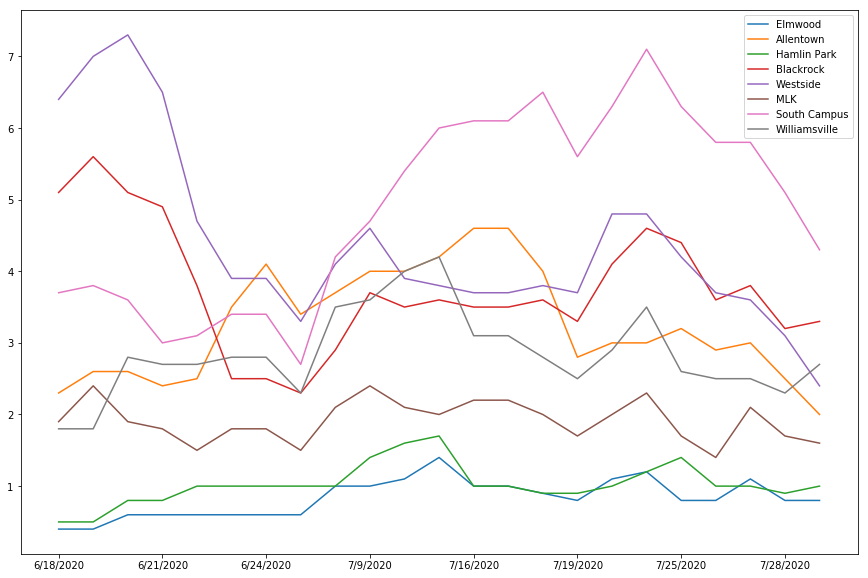

In [11]:

plt.figure(figsize=(15,10))

plt.plot(rol.index,rol['Elmwood Village'],label='Elmwood')
plt.plot(rol.index,rol['Allentown'],label='Allentown')
plt.plot(rol.index,rol['Hamlin Park'],label='Hamlin Park')
plt.plot(rol.index,rol['Black Rock/Upper West Side '],label='Blackrock')
plt.plot(rol.index,rol['West Side'],label='Westside')
plt.plot(rol.index,rol['MLK Park'],label='MLK')
plt.plot(rol.index,rol['South Campus'],label='South Campus')
plt.plot(rol.index,rol['Williamsville'],label='Williamsville')


ax=plt.gca()
plt.legend()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

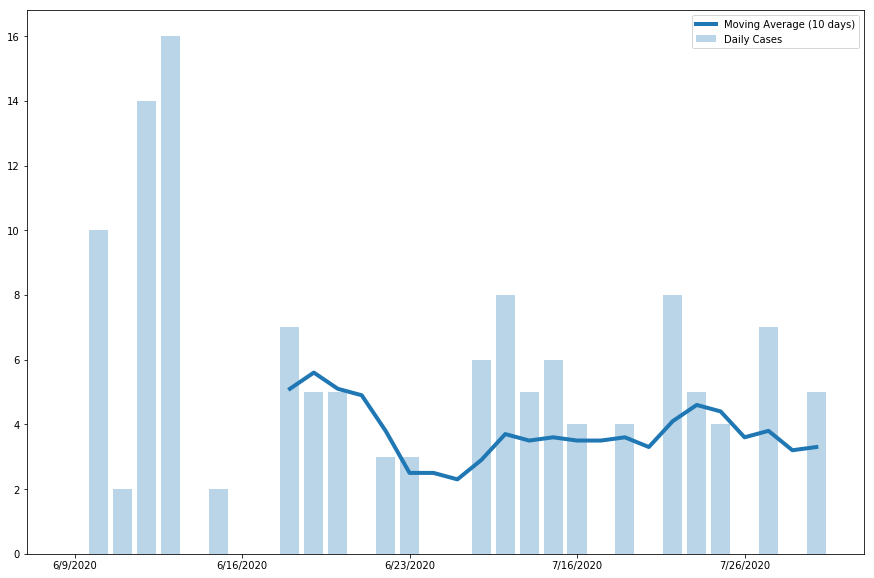

In [14]:
plt.figure(figsize=(15,10))

name = 'Black Rock/Upper West Side ' 

#plt.title()
plt.bar(diff1.index,diff1[name],label='Daily Cases',alpha=0.3)
plt.plot(rol.index,rol[name],label='Moving Average ('+str(window)+' days)',linewidth=4)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.legend()